<a href="https://colab.research.google.com/github/ashwinchelsea14/ML-start/blob/main/ML_Start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/canada_per_capita_income.csv')
df.head()

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


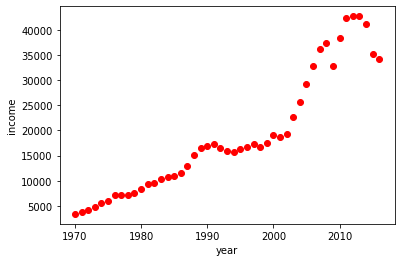

In [4]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('income')
plt.scatter(df.year,df.income,c='r')

Text(0, 0.5, 'income')

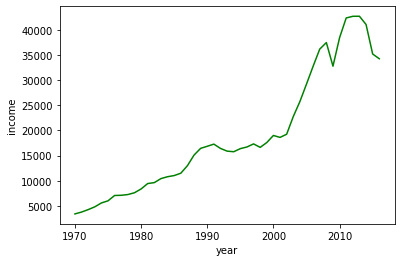

In [5]:
plt.plot(df.year,df.income,'g-')
plt.xlabel('year')
plt.ylabel('income')

In [6]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(df[['year']],df.income)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
reg.predict([[2000]]) ##18987.38241

array([24719.39258996])

In [8]:
reg.coef_

array([828.46507522])

In [9]:
reg.intercept_

-1632210.7578554575

In [10]:
828.46507522*2000+(-1632210.7578554575)

24719.39258454251

In [11]:
reg.predict([[2020]])

array([41288.69409442])

In [1]:
pip install word2number

  Created wheel for word2number: filename=word2number-1.1-cp36-none-any.whl size=5588 sha256=9f4087374668d31206e4a98328122d6cd648c2b2d4ef2caf8be91f5f0c949112
  Stored in directory: /root/.cache/pip/wheels/46/2f/53/5f5c1d275492f2fce1cdab9a9bb12d49286dead829a4078e0e
Successfully built word2number


In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from word2number import w2n

In [4]:
df=pd.read_csv('/content/hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [5]:
df.experience = df.experience.fillna("zero")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [6]:
df.experience=df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [7]:
import math
median_score=math.floor(df['test_score(out of 10)'].mean())
median_score

7

In [8]:
df['test_score(out of 10)']=df['test_score(out of 10)'].fillna(median_score)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [9]:
reg=linear_model.LinearRegression()
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

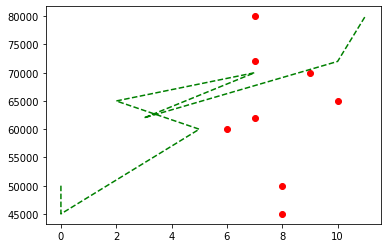

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['test_score(out of 10)'],df['salary($)'],c='r')
plt.plot(df['experience'],df['salary($)'],'g--')

In [20]:
reg.predict([[12,10,10]])

array([93747.79628651])

In [21]:
reg.predict([[2,9,6]])

array([53713.86677124])

In [13]:
##saving model using pickle
import pickle

In [23]:
with open('hiring_pickle','wb') as f:
    pickle.dump(reg,f)

In [24]:
with open('hiring_pickle','rb') as f:
    hp=pickle.load(f)

In [25]:
hp.predict([[2,9,6]])

array([53713.86677124])

In [27]:
pip install joblib

In [28]:
##saving model using sklearn joblib         ##for large numpy arrays
from sklearn.externals import joblib
joblib.dump(reg,"hiring_joblib")

['hiring_joblib']

In [29]:
hj=joblib.load("hiring_joblib")

In [30]:
hj.predict([[2,9,6]])

array([53713.86677124])